In [3]:
%matplotlib inline
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
import bcolz #imports Bcolz
from tqdm import tqdm_notebook


Using TensorFlow backend.


# Load an image using Keras

load_img is used to load the required image

In [4]:
img = load_img('/media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/cat.239.jpg') 

# Convert image to numpy array

Next, we use img_to_array to convert the image to something numerical, in this case a numpy array, which can be easily fed into our flow() function.
We store our converted numpy array to a variable x.

In [5]:
x = img_to_array(img)  # creating a Numpy array with shape (3, x, x)

# Reshape an image file as part of a series of images

Then, we have to reshape the numpy array, adding another parameter of size 1. We do so in order to make it a numpy array of order 
4 instead of order 3, to accommodate a parameter called channels axis. In case of grayscale data, the channels axis should have value 1, 
and in case of RGB data, it should have value 3.

In [6]:
x = x.reshape((1,) + x.shape)  # converting to a Numpy array with shape (1, 336, 499,3) i.e adding a single sample number

In [7]:
x.shape

(1, 336, 499, 3)

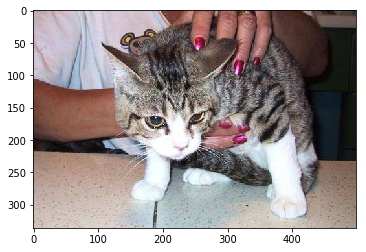

In [8]:
plt.imshow(x[0]/255);

# Load a single Image, Convert to array and reshape

32K	/media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/cat.239.jpg
(1, 224, 224, 3) after reshaping image array
float32
150528 Number of elements in the array
602112 Number of bytes in the array as float which is 4x the number of elements


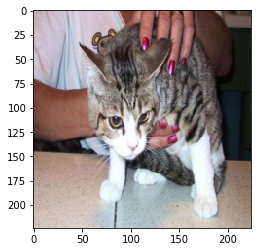

In [10]:
img_path = '/media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/cat.239.jpg' # load path into a variable
!du -h /media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/cat.239.jpg # get original file size
img = load_img(img_path, target_size=(224, 224)) # now resize image
x = img_to_array(img) # convert image to array
x = x.reshape((1,) + x.shape) # reshape the image and add a sample dimension of 1
print(x.shape, "after reshaping image array") # check new shape
print(np.result_type(x)) # check dtype of array
print(x.size, "Number of elements in the array")
print(x.nbytes, "Number of bytes in the array as float which is 4x the number of elements")
plt.imshow(x[0]/255); # plot new resized image, semi-colon suppresses unwanted output

# Grab all the cat images and store in Numpy array list

In [11]:
import os
import glob
base_dir = '/media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/' # where cat images are located

imgs = [] # prep an empty list
all_img_paths = glob.glob(os.path.join(base_dir, '*.jpg')) # find from base_dir and list all jpg files
for cats_path in all_img_paths: # pull each image into a list of 1000 images
    cats = load_img(cats_path, target_size=(224, 224)) # load images and convert to a fixed size
    img = img_to_array(cats) # convert image to array
    imgs.append(img) # append image arrays to list
X = np.array(imgs, dtype='float32') # convert list of lists to numpy 4D array
    # imgs = imgs.reshape((1,) + imgs.shape) # reshape the image and add a sample dimension of 1

In [12]:
print("Regular colour image array--> ",imgs[0].shape)
print("List of 1000 image arrays --> ",X.shape)
print("image type --> ", np.result_type(X))
print("Path to cat image -->  ", cats_path)


Regular colour image array-->  (224, 224, 3)
List of 1000 image arrays -->  (1000, 224, 224, 3)
image type -->  float32
Path to cat image -->   /media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/cat.7384.jpg


# Dealing with images as floats in Matplotlib

When a regular RGB image in range (0,255) is cast as float in matplotlib, then displayed by matplotlib, the image is displayed as a negative. If it is cast as uint8, it displays correctly. If the image is a float and divided by 255 then it displays correctly as well. Floats are typically used becuase they provide more precision.

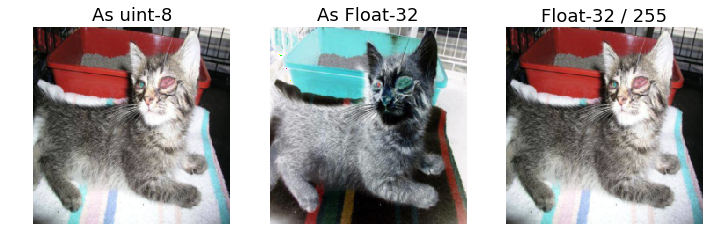

In [13]:
plt.figure(figsize=(12,6))
sp = plt.subplot(1,3,1); # use 1 row, expect 3 images, this is image 1
sp.set_title("As uint-8", fontsize=18)
sp.axis('Off')
sp.imshow(np.uint8(imgs[0])); # recast as uint8
sp = plt.subplot(1,3,2) # use same row as above, expect 3 images, this is image 2
sp.set_title("As Float-32", fontsize=18)
sp.imshow(imgs[0]); # as float
sp.axis('Off')
sp = plt.subplot(1,3,3) # use same row as above, expect 3 images, this is image 3
sp.set_title("Float-32 / 255", fontsize=18)
sp.imshow(imgs[0]/255) # as float but divided by 255
sp.axis('Off')
plt.show() # use to suppress matplotlib object printing on screen or use semi-colon as well works

# Auto count classes based on Class folders

In [14]:
folder = glob.glob("/media/bigdrive/course/deeplearning1/data/dogscats/valid/*") # count folder below this directory assume its class folders
print("Classes = ",len(folder)) # count up folders


Classes =  2


# Preprocess Images no labels

In [15]:
import os
import glob
import numpy as np

def get_class(img_path):
    return int(img_path.split('/')[-2])

root_dir = '/media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/' # where cats/dogs folders of images are located
imgs = []
labels = []

all_img_paths = glob.glob(os.path.join(root_dir, '*.jpg')) # find from root_dir and list all jpg files
for cats_path in all_img_paths: # pull each image into a list of 1000 images
    cats = load_img(cats_path, target_size=(224, 224)) # load images and convert to a fixed size
    img = img_to_array(cats) # convert image to array
    imgs.append(img)
X1 = np.array(imgs, dtype='float32') # convert list of lists to numpy 4D array
    # imgs = imgs.reshape((1,) + imgs.shape) # reshape the image and add a sample dimension of 1

In [16]:
X1.shape

(1000, 224, 224, 3)

# Load images and labels using Keras

In [22]:
# forked from https://chsasank.github.io/keras-tutorial.html
# loads entire memory no batches
import os
import glob
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img

NUM_CLASSES = 2 # two classes cats and dogs

def get_class(img_path): # resolved by loop below
    return int(img_path.split('/')[-2]) # send back class of each image 1 if dog 0 if cat based on folder name!

root_dir = '/home/sl/scratch_pad/valid/' # below this directory are where cats/dogs folders of images are located
imgs = [] # list of images
labels = [] # list of labels

#sample_limit = 25 # just set a loop limit for testing purposes
a = 0
all_img_paths = glob.glob(os.path.join(root_dir, '*/*.jpg'))  # find class folders from base_dir and list all jpg files in each
np.random.shuffle(all_img_paths) # helpful to shuffle but not needed
for img_path in all_img_paths:
    img = load_img(img_path, target_size=(224, 224)) # load image from target path and resize on the fly in memory
    img = img_to_array(img) # convert image to array
    label = get_class(img_path) # only works if folder names are actual numbers
    imgs.append(img) # add each image to a list of lists
    labels.append(label) # append our labels together which are just 1 or 0 in this case
    a +=1
    #if a == sample_limit:
        #break
X = np.array(imgs, dtype='float32') # convert list of images to numpy array
# Make one hot targets
Y = np.eye(NUM_CLASSES, dtype='uint8')[labels] # Make one hot targets

# One-Hot encoded label

(2000, 224, 224, 3) Shape of cats and dogs image array
150528  Number of elements in the array as float32 which is 224 x 224 x 3
602112  Number of bytes in the array as float which is 4x the number of elements
128 Memory size of object X[0]


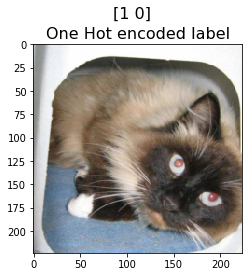

In [23]:
# show 1 image and one hot encoded symbol get a base line on actual data elements
plt.imshow(X[0]/255)
print(X.shape, "Shape of cats and dogs image array")
print(X[0].size, " Number of elements in the array as float32 which is 224 x 224 x 3")
print(X[0].nbytes, " Number of bytes in the array as float which is 4x the number of elements")
print(sys.getsizeof(X[0]), "Memory size of object X[0]")
plt.title("One Hot encoded label",fontsize=16)
plt.suptitle(Y[1], fontsize=16); # use semi colon to suppress matplotlib object printing on screen
plt.subplots_adjust(top=0.85) # puts some space between title and one - hot sub title

# Save all images as bcolz array

In [24]:
import bcolz #imports Bcolz
from tqdm import tqdm_notebook
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush() # converts numpy array to bcolz

save_array(root_dir+'new_X.bc', X) # saves numpy array X as bcolz to root_dir creating new folder new.X.bc

    

# Load all images as bcolz array

In [25]:
def load_array(fname): return bcolz.open(fname)[:] #opens bcolz

Xv2 = load_array(root_dir+'new_X.bc') # loads array to Xv2 variable


# Check shape

In [26]:
Xv2.shape

(2000, 224, 224, 3)

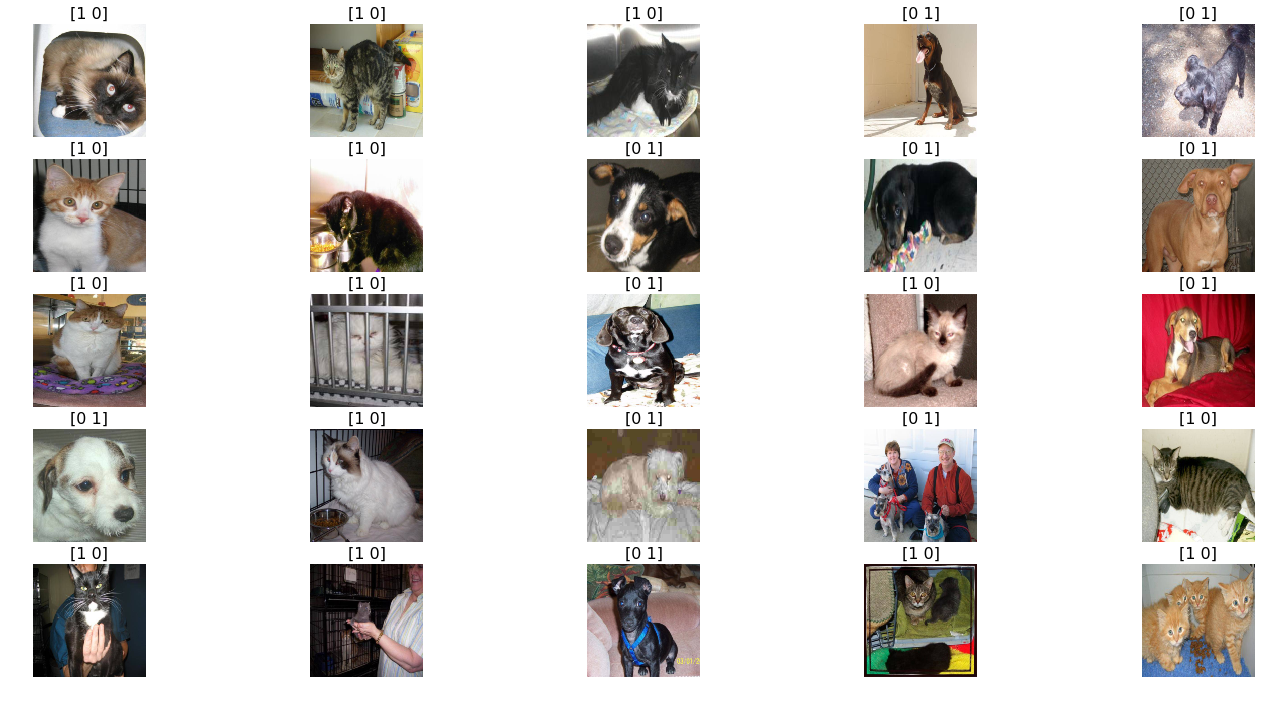

In [40]:
# as function used in fast.ai
# images & rows need to be wholly divisable e.g 25 images / 5 rows
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

plots(X[:25],figsize = (24,12), titles=Y) # best used for batches

# Show some cats / dog images with one hot labels

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

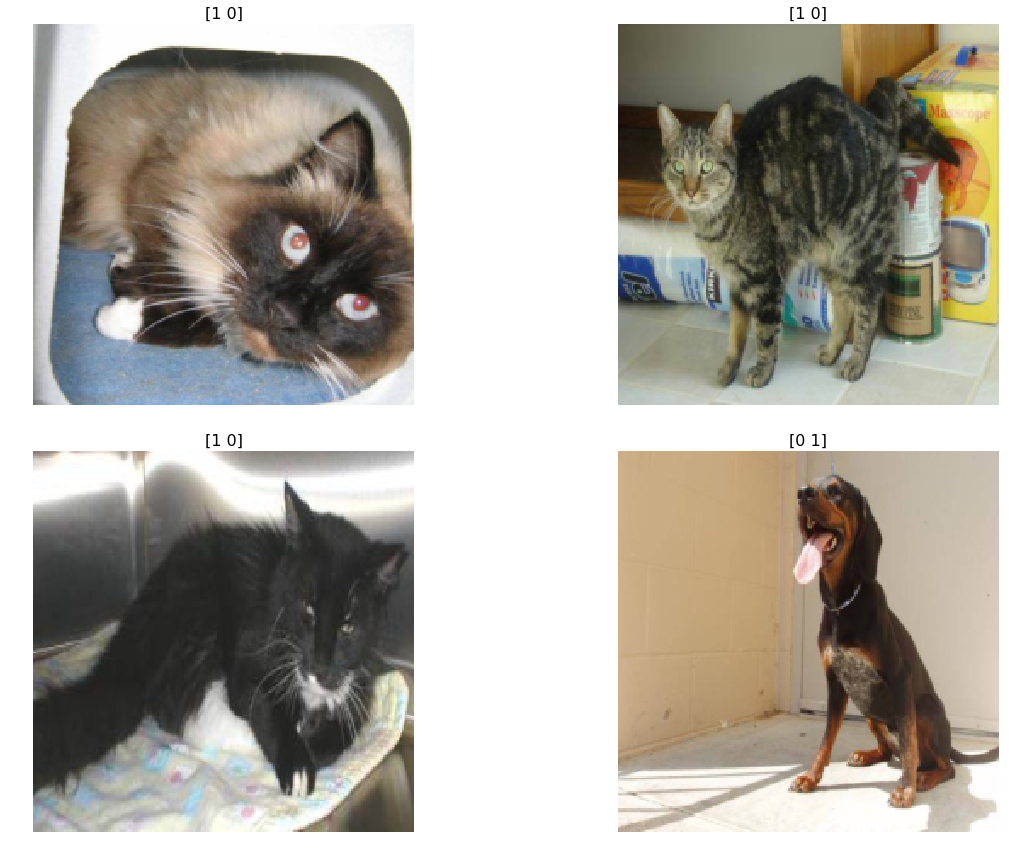

In [41]:
import math
from tqdm import tqdm_notebook
# raw script without transpose statment modified to handle many images with nice format
num_images = 4          # number of images to display try to choose even numbers
ims = X[:num_images]/255 # slice first dimension to show a set number of images
figsize=(24,12)          # needs adjustment by this ratio when more images are displayed as they shrink
squared = int(math.sqrt(num_images)) # used to grid the pictures when possible

# some rules below to get more items on a page - square numbers work best 4,9,16,25 and even 2,4,6,8
if num_images %2 ==0 and squared**2 == num_images  :
    #print("rule 1")
    rows = squared
elif squared**2 == num_images:
    rows = squared
    #print("rule 2")
elif num_images %2 !=0:
    rows = 1 
    #print("rule 3")
elif num_images %2 == 0 and squared**2 != num_images :
    rows = 2  
    #print("rule 4")
else:    
    rows = num_images // squared
    #print("rule 5")

interp=False 
titles=Y                                       # insert label variable here
bar = tqdm_notebook(total=num_images)          # set bar graph to num_images to iterate over 
f = plt.figure(figsize=figsize)
for i in np.arange(len(ims)):                  # np.arange seems quicker on balance than range 
    sp = f.add_subplot(rows, len(ims)//rows, i + 1 )
    sp.axis('Off')
    if titles is not None:
        sp.set_title(titles[i], fontsize=16)   # adjust font if viewing large number
    plt.imshow(ims[i], interpolation=None if interp else 'none')
    plt.tight_layout()                         # space images out neatly
    bar.update()                               # update the bar at each pass through loop
#plots(X, titles=Y)

# A better image iterator keeps fixed size and handles odd number images

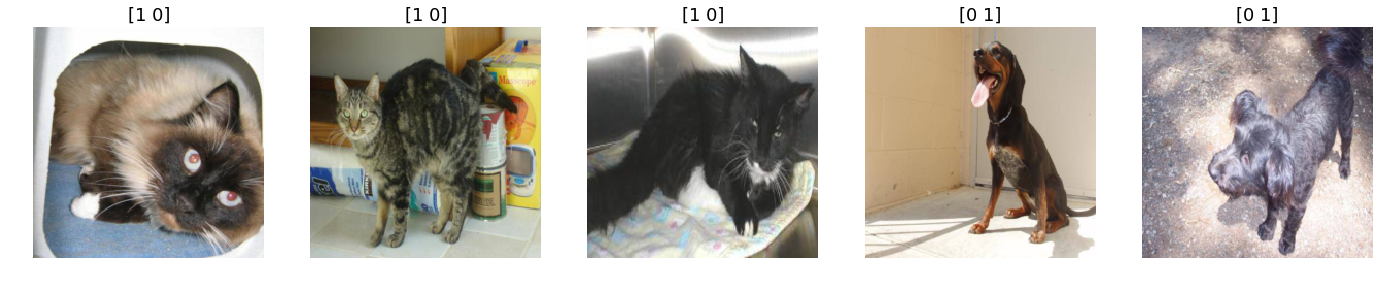

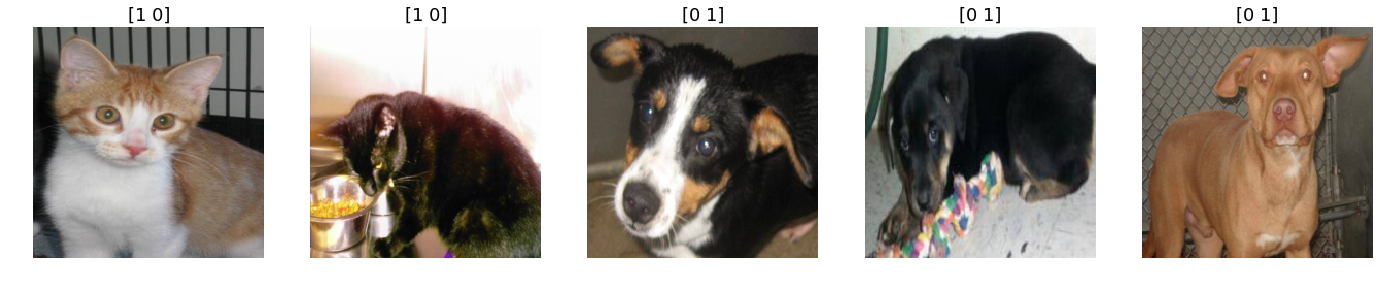

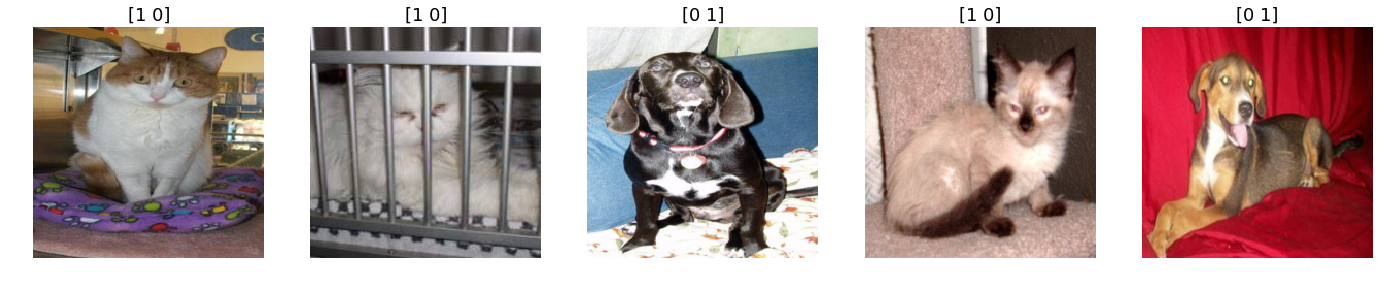

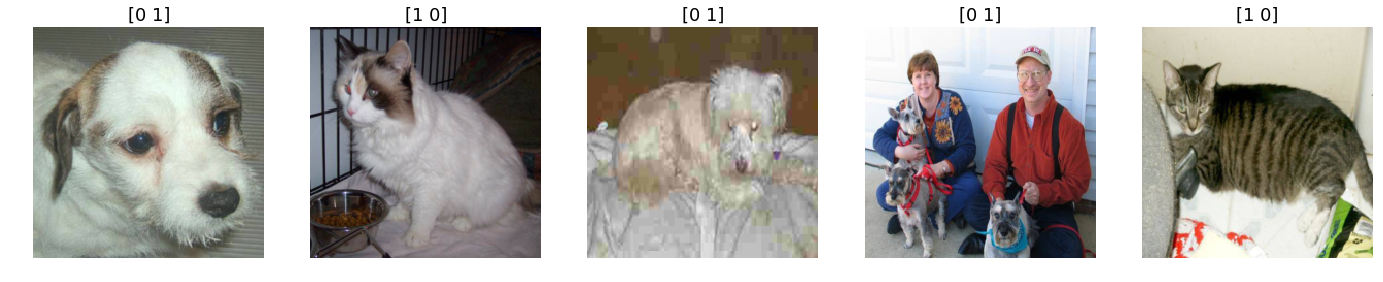

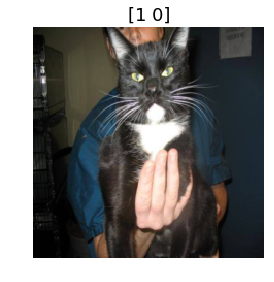

In [42]:
# forked from https://www.kaggle.com/vfdev5/data-visualization-and-analysis
max_counter = 21
counter = 0
n = 5
titles=Y # Y typically the labels in this case 1-shot

for item in imgs: # X might be the training DB   
    if counter % n == 0:
        plt.figure(figsize=(24,12))
    sp = plt.subplot(1, n, counter % n + 1)
    plt.axis('off')
    if titles is not None:
        sp.set_title(titles[counter], fontsize=18)   # adjust font if viewing large number
    
    plt.imshow(imgs[counter]/255)

    counter += 1
    if counter == max_counter:
        break

# Crop image to fixed dimensions for CNN

In [43]:
# Forked f
import imutils
import cv2

class AspectAwarePreprocessor:
	def __init__(self, width, height, inter=cv2.INTER_AREA):
		# store the target image width, height, and interpolation
		# method used when resizing
		self.width = width
		self.height = height
		self.inter = inter

	def preprocess(self, image):
		# grab the dimensions of the image and then initialize
		# the deltas to use when cropping
		(h, w) = image.shape[:2]
		dW = 0
		dH = 0

		# if the width is smaller than the height, then resize
		# along the width (i.e., the smaller dimension) and then
		# update the deltas to crop the height to the desired
		# dimension
		if w < h:
			image = imutils.resize(image, width=self.width,
				inter=self.inter)
			dH = int((image.shape[0] - self.height) / 2.0)

		# otherwise, the height is smaller than the width so
		# resize along the height and then update the deltas
		# crop along the width
		else:
			image = imutils.resize(image, height=self.height,
				inter=self.inter)
			dW = int((image.shape[1] - self.width) / 2.0)

		# now that our images have been resized, we need to
		# re-grab the width and height, followed by performing
		# the crop
		(h, w) = image.shape[:2]
		image = image[dH:h - dH, dW:w - dW]

		# finally, resize the image to the provided spatial
		# dimensions to ensure our output image is always a fixed
		# size
		return cv2.resize(image, (self.width, self.height),
			interpolation=self.inter)

In [44]:
import os
import glob
base_dir = '/media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/' # where cat images are located
aap = AspectAwarePreprocessor(224, 224)
imgs = [] # prep an empty list
all_img_paths = glob.glob(os.path.join(base_dir, '*.jpg')) # find from base_dir and list all jpg files
for cats_path in all_img_paths: # pull each image into a list of 1000 images
    image = load_img(cats_path, target_size=None) # load images and convert to a fixed size
    #image = cv2.imread(cats_path)
    image = img_to_array(image) # image is converted to a Keras-compatible array
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    zap = aap.preprocess(image)
    #images = np.expand_dims(imgs, axis=0)
    #print(image)
    imgs.append(zap) # append image arrays to list
    
    #print(imgs[0].shape)
    #imgs[np.newaxis,i,:,:,3].shape
    #images = np.expand_dims(imgs, axis=0)
    X2 = np.array(imgs, dtype='float32') # convert list of lists to numpy 4D array
    #images = imgs.reshape((1,) + imgs.shape) # reshape the image and add a sample dimension of 1

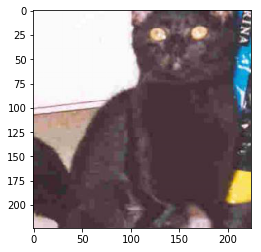

In [45]:
plt.imshow(X2[4]/255);

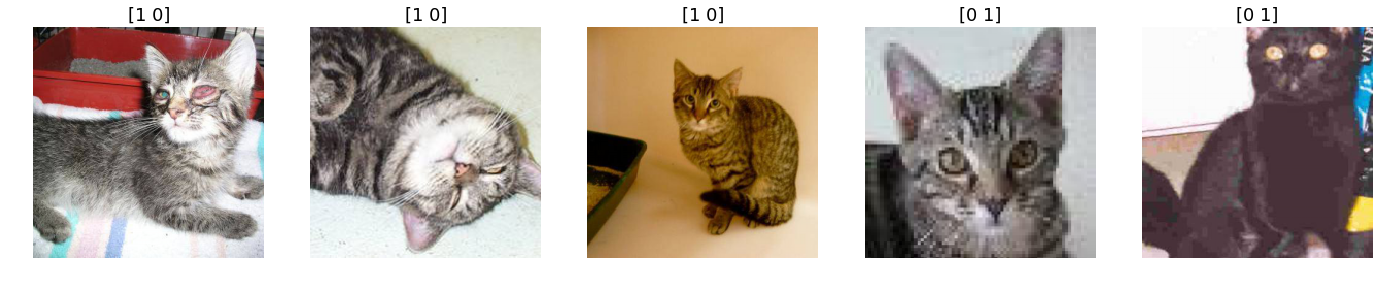

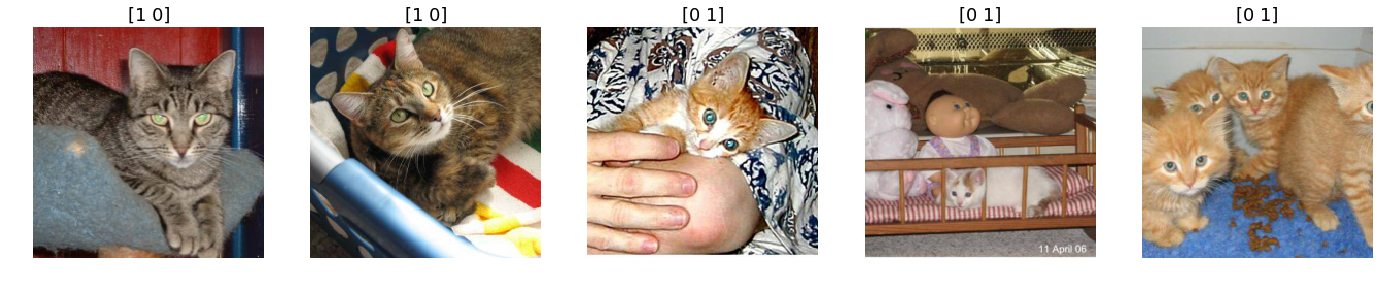

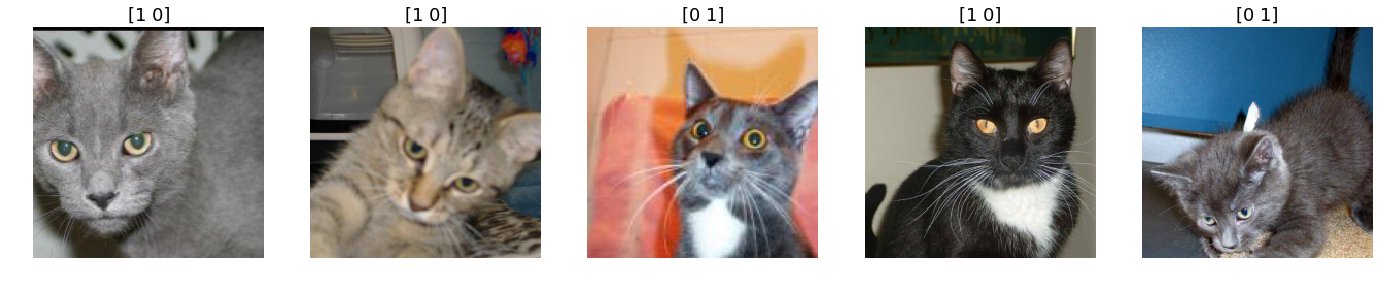

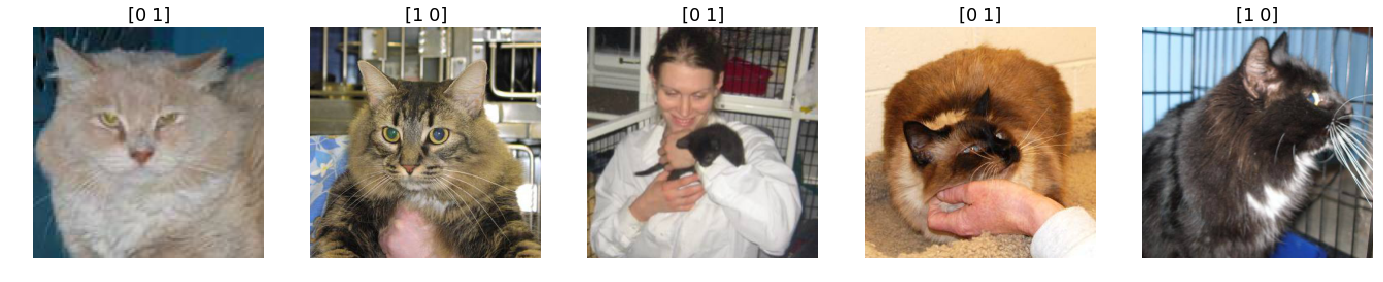

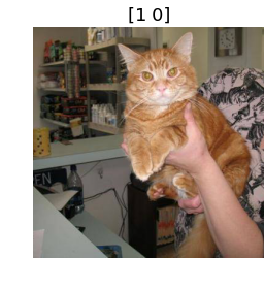

In [46]:
# forked from https://www.kaggle.com/vfdev5/data-visualization-and-analysis
max_counter = 21
counter = 0
n = 5
titles=Y # Y typically the labels in this case 1-shot

for item in X2: # X might be the training DB   
    if counter % n == 0:
        plt.figure(figsize=(24,12))
    sp = plt.subplot(1, n, counter % n + 1)
    plt.axis('off')
    if titles is not None:
        sp.set_title(titles[counter], fontsize=18)   # adjust font if viewing large number
    
    plt.imshow(X2[counter]/255)

    counter += 1
    if counter == max_counter:
        break

# Pad image to fixed dimensions for CNN - black border

In [47]:
# import the necessary packages
import imutils
import cv2

def preprocess_pad(image, width, height):
	# grab the dimensions of the image, then initialize
	# the padding values
	(h, w) = image.shape[:2]

	# if the width is greater than the height then resize along
	# the width
	if w > h:
		image = imutils.resize(image, width=width)

	# otherwise, the height is greater than the width so resize
	# along the height
	else:
		image = imutils.resize(image, height=height)

	# determine the padding values for the width and height to
	# obtain the target dimensions
	padW = int((width - image.shape[1]) / 2.0)
	padH = int((height - image.shape[0]) / 2.0)

	# pad the image then apply one more resizing to handle any
	# rounding issues
	image = cv2.copyMakeBorder(image, padH, padH, padW, padW,
		cv2.BORDER_CONSTANT, value=0) # paints a black border on any axis that is less than 500 pixels: NB can be changed.
	image = cv2.resize(image, (width, height))

	# return the pre-processed image
	return image

In [48]:
import os
import glob

base_dir = '/media/bigdrive/course/deeplearning1/data/dogscats/valid/cats/' # where cat images are located
#aap = AspectAwarePreprocessor(224, 224)
imgs = [] # prep an empty list
count = 1
all_img_paths = glob.glob(os.path.join(base_dir, '*.jpg')) # find from base_dir and list all jpg files
for cats_path in all_img_paths : # pull each image into a list of 1000 images
    pics = load_img(cats_path, target_size=None) # load images and convert to a fixed size
    image = img_to_array(pics) # image is converted to a Keras-compatible array
    img_process = preprocess_pad(image,500,500) # Call preprocess_pad and feed in requested image size
    imgs.append(img_process) # append image arrays to list
    X3 = np.array(imgs, dtype='float32') # convert list of lists to numpy 4D array
    count += 1
    if count > 100: 
        break

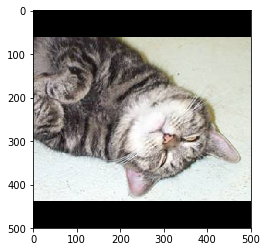

In [49]:
plt.imshow(X3[1]/255);

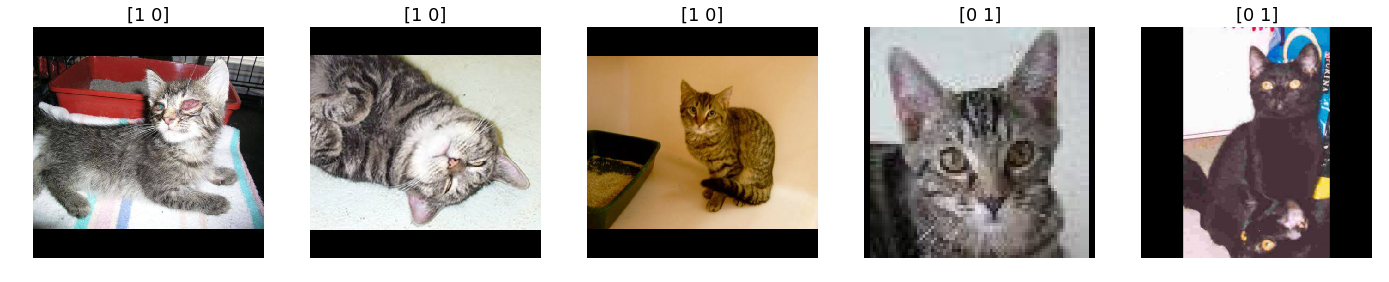

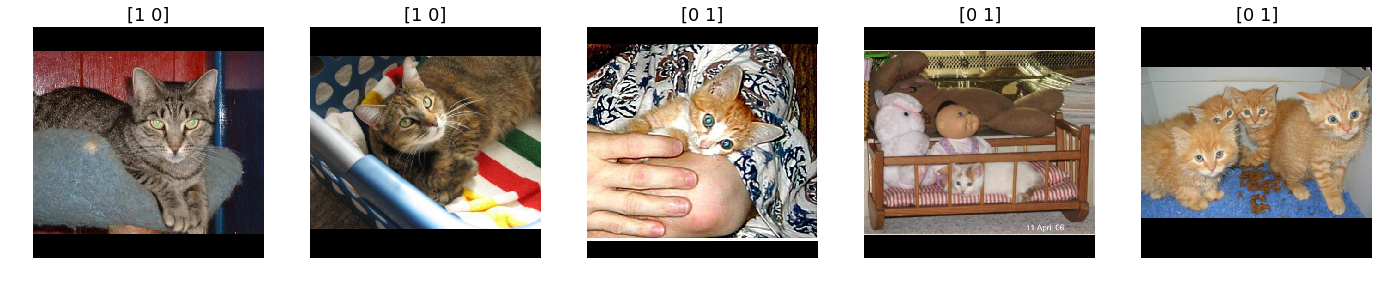

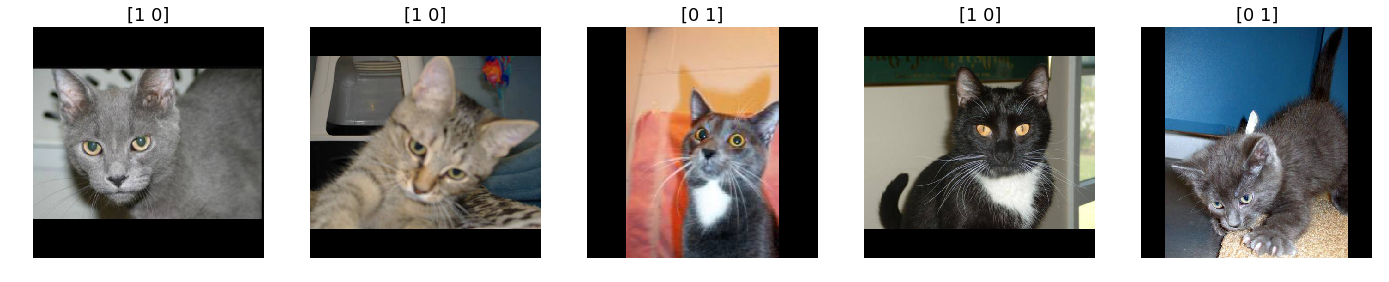

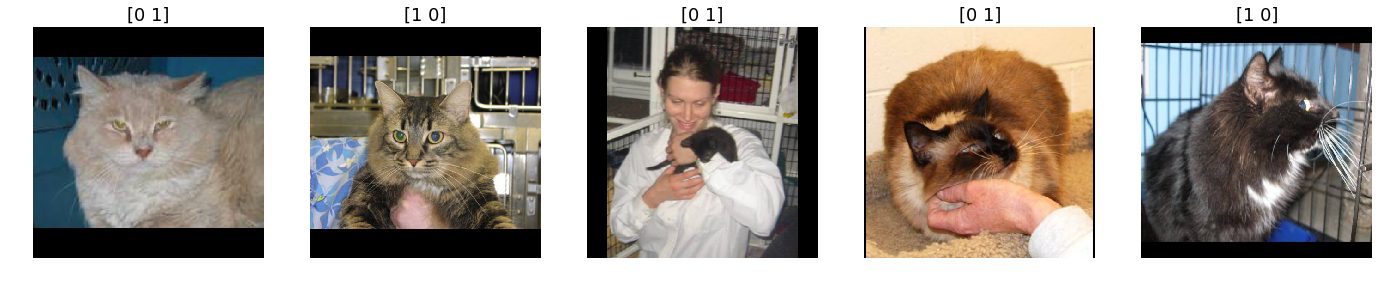

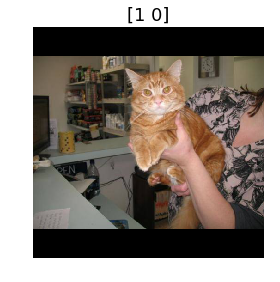

In [50]:
# forked from https://www.kaggle.com/vfdev5/data-visualization-and-analysis
max_counter = 21
counter = 0
n = 5
titles=Y # Y typically the labels in this case 1-shot

for item in X3: # X might be the training DB   
    if counter % n == 0:
        plt.figure(figsize=(24,12))
    sp = plt.subplot(1, n, counter % n + 1)
    plt.axis('off')
    if titles is not None:
        sp.set_title(titles[counter], fontsize=18)   # adjust font if viewing large number
    
    plt.imshow(X3[counter]/255)

    counter += 1
    if counter == max_counter:
        break